<a href="https://colab.research.google.com/github/abdelrhmanhesham1/project/blob/main/Agricultural_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("/content/File 1 (1).csv")

# Features and target
x = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Check for missing values
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
number of duplicate rows:  (0, 8)


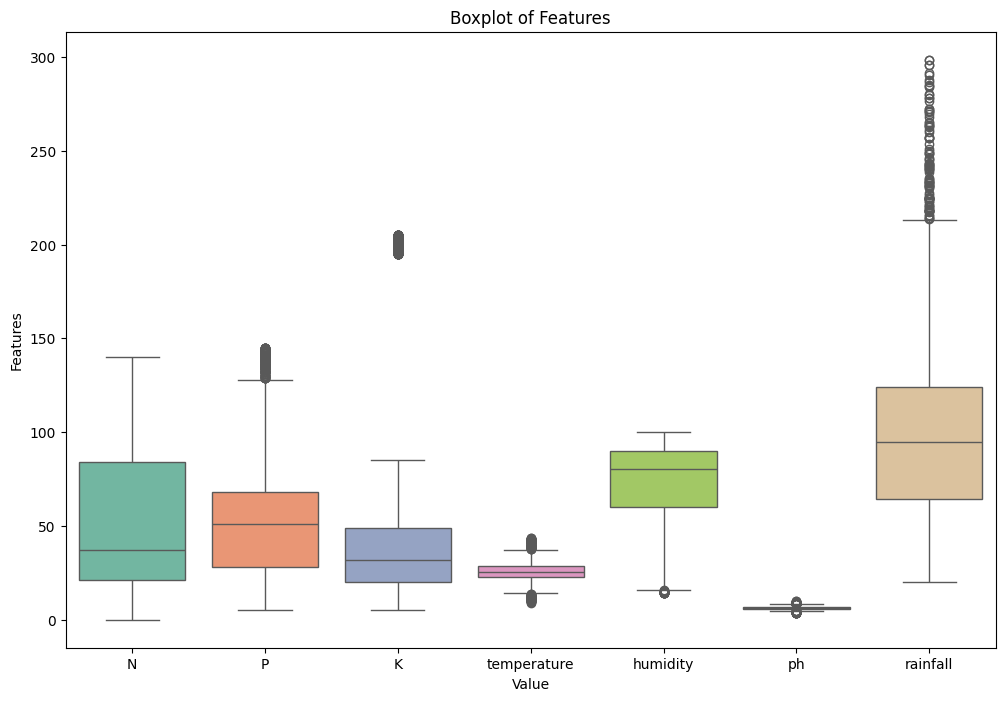

In [ ]:
# Boxplot for features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient="v", palette="Set2")
plt.title("Boxplot of Features")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()



In [ ]:
num_col=list(df.select_dtypes(include=['int64','float64']).columns)
q1 = df[num_col].quantile(0.25)
q3 = df[num_col].quantile(0.75)
iqr = q3 - q1
uper_fence = q3 + 1.5 * iqr
lower_fence = q1 - 1.5 * iqr
def include_outliers(df=df,num_cols=num_col,lower_fence=lower_fence,uper_fence=uper_fence):
    exist_outlier=dict()
    for col in num_cols:
        if ((df[col]>uper_fence[col]).any()) or  ((df[col]<lower_fence[col]).any()):
            exist_outlier[col]=True

    return exist_outlier

outlier_dict=include_outliers()
outlier_dict
for col in outlier_dict.keys():
    df[col]=np.where(df[col]>uper_fence[col],uper_fence[col],df[col])
    df[col]=np.where(df[col]<lower_fence[col],lower_fence[col],df[col])


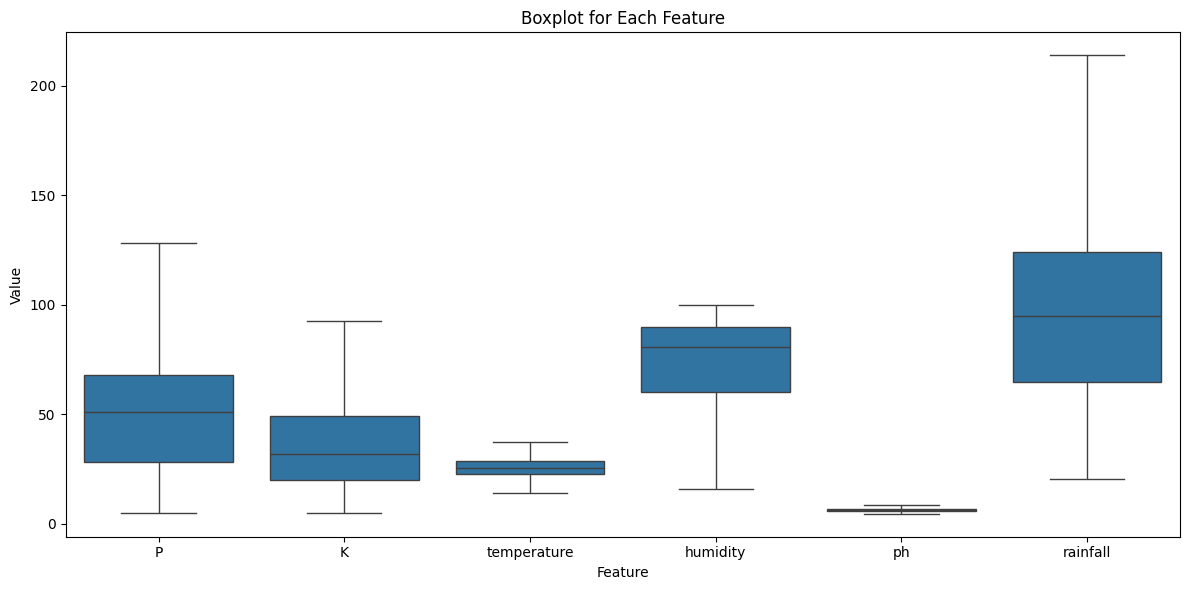

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame
df_melted = df.melt(value_vars=outlier_dict.keys(), var_name='Feature', value_name='Value')

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.title('Boxplot for Each Feature')
plt.tight_layout()
plt.show()

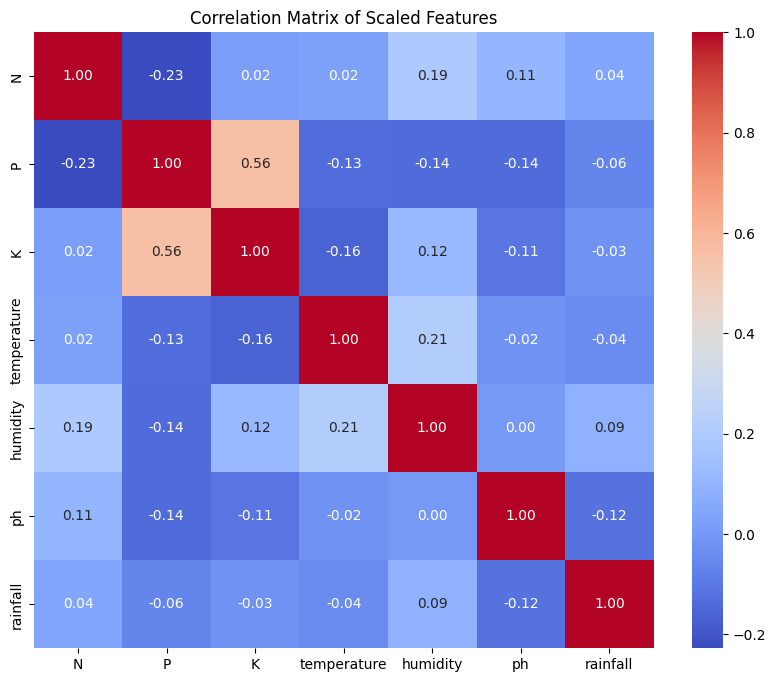

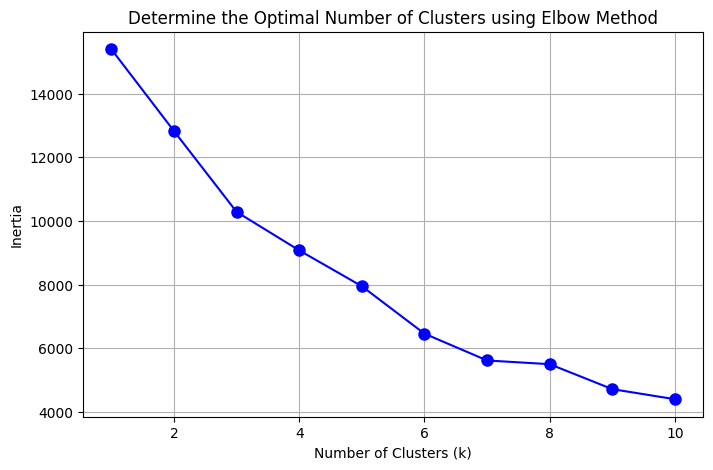

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_col]), columns=num_col)

# Correlation matrix and heatmap
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Scaled Features")
plt.show()

# Elbow Method to determine the optimal number of clusters
inertia = []
K = range(1, 11)  # Test 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Determine the Optimal Number of Clusters using Elbow Method')
plt.grid(True)
plt.show()

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Crop prediction function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = model.predict(input_data)
    return prediction[0]  # Return the prediction result

# Get user inputs
N = float(input("Enter Nitrogen level (N): "))
P = float(input("Enter Phosphorus level (P): "))
K = float(input("Enter Potassium level (K): "))
temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
ph = float(input("Enter pH: "))
rainfall = float(input("Enter Rainfall (mm): "))

# Predict crop
recommended_crop = predict_crop(N, P, K, temperature, humidity, ph, rainfall)
print(f"\nGiven Conditions:\n"
      f"Nitrogen: {N}, Phosphorus: {P}, Potassium: {K}\n"
      f"Temperature: {temperature}°C, Humidity: {humidity}%, pH: {ph}, Rainfall: {rainfall}mm\n"
      f"Recommended Crop: {recommended_crop}")


Model Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [ ]:
pip install dash dash-bootstrap-components pandas scikit-learn


In [ ]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout of the dashboard
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Crop Recommendation Dashboard"), width=12)
    ]),
    dbc.Row([
        dbc.Col([
            html.Label("Nitrogen (N)"),
            dcc.Slider(id='n-slider', min=0, max=140, step=1, value=50, marks={i: str(i) for i in range(0, 141, 20)}),
            html.Label("Phosphorus (P)"),
            dcc.Slider(id='p-slider', min=0, max=140, step=1, value=40, marks={i: str(i) for i in range(0, 141, 20)}),
            html.Label("Potassium (K)"),
            dcc.Slider(id='k-slider', min=0, max=210, step=1, value=30, marks={i: str(i) for i in range(0, 211, 30)}),
            html.Label("Temperature (°C)"),
            dcc.Slider(id='temp-slider', min=0, max=50, step=1, value=25, marks={i: str(i) for i in range(0, 51, 10)}),
            html.Label("Humidity (%)"),
            dcc.Slider(id='humidity-slider', min=0, max=100, step=1, value=70, marks={i: str(i) for i in range(0, 101, 20)}),
            html.Label("pH"),
            dcc.Slider(id='ph-slider', min=0, max=14, step=0.1, value=6.5, marks={i: str(i) for i in range(0, 15, 2)}),
            html.Label("Rainfall (mm)"),
            dcc.Slider(id='rainfall-slider', min=0, max=300, step=1, value=200, marks={i: str(i) for i in range(0, 301, 50)}),
        ], width=6),
        dbc.Col([
            html.H3("Recommended Crop:"),
            html.Div(id='recommended-crop', style={'fontSize': 24, 'color': 'green', 'marginTop': 20})
        ], width=6)
    ])
])

# Callback to update the recommended crop
@app.callback(
    Output('recommended-crop', 'children'),
    [Input('n-slider', 'value'),
     Input('p-slider', 'value'),
     Input('k-slider', 'value'),
     Input('temp-slider', 'value'),
     Input('humidity-slider', 'value'),
     Input('ph-slider', 'value'),
     Input('rainfall-slider', 'value')]
)
def update_crop_recommendation(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = model.predict(input_data)
    return prediction[0]

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>